In [26]:
import pandas as pd

In [27]:
data = pd.read_csv('data/train.csv', sep=',')

In [28]:
# нет пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60487 entries, 0 to 60486
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      60487 non-null  int64
 1   time    60487 non-null  int64
 2   x       60487 non-null  int64
 3   y       60487 non-null  int64
dtypes: int64(4)
memory usage: 1.8 MB


In [29]:
import numpy as np

In [30]:
data.describe()

,id,time,x,y
count,60487.000000,6.048700e+04,60487.000000,60487.000000
mean,136.440607,2.503140e+05,617.766677,0.148148
std,74.537697,3.457017e+05,287.553536,0.355249
min,1.000000,0.000000e+00,12.000000,0.000000
25%,87.000000,4.122800e+04,548.000000,0.000000
50%,137.000000,1.014480e+05,624.000000,0.000000
75%,197.000000,3.032860e+05,732.000000,0.000000
max,275.000000,1.868576e+06,40900.000000,1.000000


In [31]:
import matplotlib.pyplot as plt

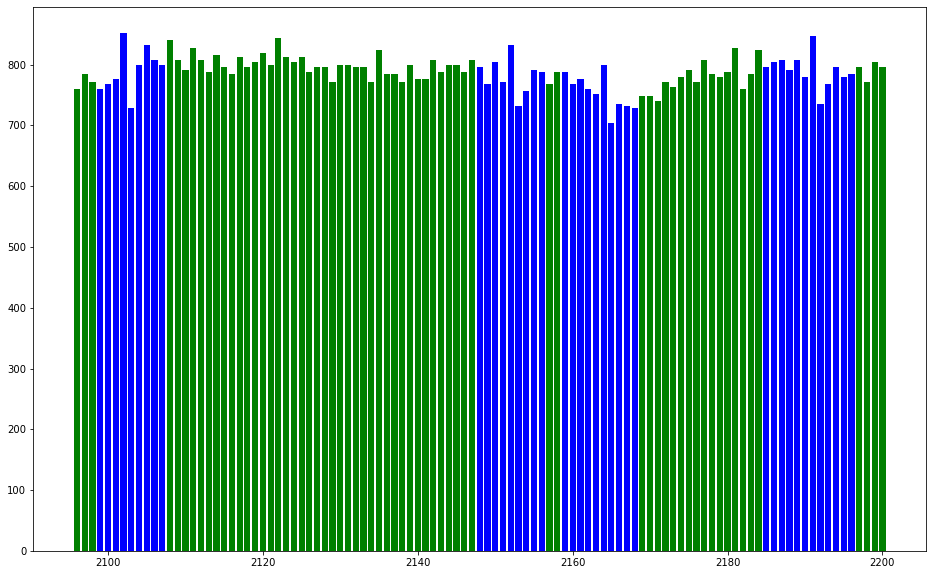

In [150]:
data['color'] = 'g'
data.loc[data['y'] == 1, 'color'] = 'b'

plt.figure(figsize=(16, 10))
plt.bar(data.loc[data['id'] == 3].index, data.loc[data['id'] == 3, 'x'], color=data.loc[data['id'] == 3, 'color'] )
plt.savefig('testfig0.png')

In [33]:
data.drop(columns='color', inplace=True)

In [34]:
new_data = pd.DataFrame(columns=['count', 'anomaly'])

In [138]:
STEP = 10000

def_list = []
user1 = data.loc[data.id == 1, ['time']]

anomaly_list = []

for index in user1.loc[user1.time < (user1.time.max() - STEP)].index:

    curr_value = user1.loc[index]
    next_value = curr_value.time + STEP

    nearest = user1.loc[index + 1 :]

    nearest_index = (nearest.time - next_value).abs().sort_values().index[0]
    #print(nearest_index)
    def_list.append(nearest_index - index)

    anomaly = data.loc[index : nearest_index, 'y']

    if 1 in anomaly.values:
        anomaly_list.append(1)
    else:
        anomaly_list.append(0)



In [139]:
new_data['count'] = def_list
new_data['anomaly'] = anomaly_list

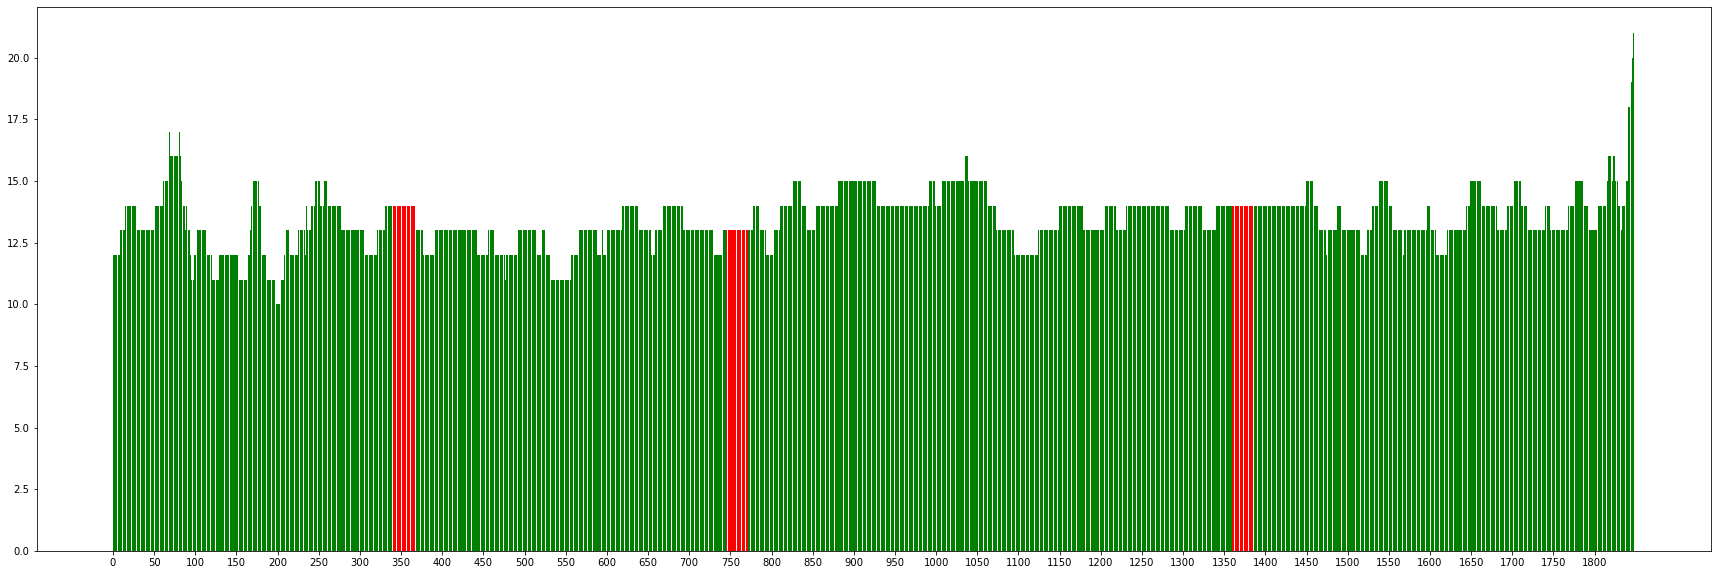

In [149]:
new_data['color'] = 'g'
new_data.loc[new_data['anomaly'] == 1, 'color'] = 'r'

plt.figure(figsize=(30, 10))

plt.bar(new_data.index, new_data['count'].values, color=new_data['color'].values)
plt.xticks([x for x in range(0,new_data.shape[0], 50 )] )
plt.savefig('testfig.png')

In [141]:
new_data

,count,anomaly,color
0,12,0,g
1,12,0,g
2,12,0,g
3,12,0,g
4,12,0,g
...,...,...,...
1844,19,0,g
1845,19,0,g
1846,20,0,g
1847,21,0,g
